In [86]:
#librairie pandas
import pandas
import numpy
import matplotlib.pyplot as plt
#version
print(pandas.__version__) # 0.23.0
#chargement de la première feuille de données
XXX = pandas.read_csv("projects.csv")

1.1.3


In [87]:
XXX

,id,name,client_id,idProject,idResource,idProjectType,idStatus,done,doneDate,creationDate,...,status,setDoneStatus,setHandledStatus,day,realWork,leftWork,realCost,leftCost,totalRealCost,totalLeftCost
0,1,Project 1,13.0,12.0,12.0,48,1,0,NaN,2018-02-19 00:00:00,...,recorded,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Project 2,15.0,12.0,5.0,48,1,0,NaN,2018-02-19 00:00:00,...,recorded,0,0,20181212.0,113.50,NaN,NaN,NaN,NaN,NaN
2,3,Project 3,9.0,12.0,12.0,48,1,0,NaN,2018-02-19 00:00:00,...,recorded,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Project 4,7.0,12.0,5.0,48,4,1,2020-09-29 00:00:00,2018-02-19 00:00:00,...,done,1,1,20200605.0,18.75,NaN,775.0,NaN,775.0,NaN
4,5,Project 5,6.0,12.0,12.0,48,1,0,NaN,2018-02-19 00:00:00,...,recorded,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,98,Project 98,36.0,12.0,5.0,48,1,0,NaN,2020-11-18 00:00:00,...,recorded,0,0,20210108.0,10.50,NaN,NaN,NaN,NaN,NaN
96,99,Project 99,32.0,12.0,34.0,48,1,0,NaN,2020-11-23 00:00:00,...,recorded,0,0,20210122.0,22.25,NaN,NaN,NaN,NaN,NaN
97,100,Project 100,32.0,12.0,5.0,48,1,0,NaN,2020-11-23 00:00:00,...,recorded,0,0,20210126.0,83.50,NaN,NaN,NaN,NaN,NaN
98,101,Project 101,46.0,12.0,5.0,48,1,0,NaN,2020-11-26 00:00:00,...,recorded,0,0,20210107.0,24.75,NaN,NaN,NaN,NaN,NaN


In [88]:
status = {
"recorded": 1,
"qualified": 2,
"in progress": 3,
"done": 4,
"verified": 5,
"delivered": 6,
"closed": 7,
"re-opened": 8,
"cancelled": 9,
"assigned": 10,
"accepted": 11,
"validated": 12,
"prepared": 13,
"copied": 14
}
tp = {
"Fixed Price": 1,
"Administrative": 2,
"Time & Materials": 3
}
XX =  XXX[['done','type','status','realWork','realCost']]
XX["status"] = XXX["status"].map(status)
XX["type"] = XXX["type"].map(tp)
X = XX.replace(numpy.nan,0)
X

<ipython-input-88-ddce7e3e561e>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XX["status"] = XXX["status"].map(status)
<ipython-input-88-ddce7e3e561e>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XX["type"] = XXX["type"].map(tp)


,done,type,status,realWork,realCost
0,0,1,1,0.00,0.0
1,0,1,1,113.50,0.0
2,0,1,1,0.00,0.0
3,1,1,4,18.75,775.0
4,0,1,1,0.00,0.0
...,...,...,...,...,...
95,0,1,1,10.50,0.0
96,0,1,1,22.25,0.0
97,0,1,1,83.50,0.0
98,0,1,1,24.75,0.0


In [89]:
#dimension
print(X.shape) # (18, 6)
#nombre d'observations
n = X.shape[0]
#nombre de variables
p = X.shape[1]
#affichage des données
print(X)

(100, 5)
    done  type  status  realWork  realCost
0      0     1       1      0.00       0.0
1      0     1       1    113.50       0.0
2      0     1       1      0.00       0.0
3      1     1       4     18.75     775.0
4      0     1       1      0.00       0.0
..   ...   ...     ...       ...       ...
95     0     1       1     10.50       0.0
96     0     1       1     22.25       0.0
97     0     1       1     83.50       0.0
98     0     1       1     24.75       0.0
99     0     1       1      5.75       0.0

[100 rows x 5 columns]


In [90]:
#scikit-learn
import sklearn
#vérification de la version
print(sklearn.__version__) # 0.19.1

0.23.2


In [91]:
#classe pour standardisation
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(X)
print(Z)

[[-1.42857143e-01 -1.35388105e-01 -2.64549165e-01 -2.86831002e-01
  -2.03990433e-01]
 [-1.42857143e-01 -1.35388105e-01 -2.64549165e-01 -1.97840880e-01
  -2.03990433e-01]
 [-1.42857143e-01 -1.35388105e-01 -2.64549165e-01 -2.86831002e-01
  -2.03990433e-01]
 [ 7.00000000e+00 -1.35388105e-01  1.67117643e+00 -2.72129991e-01
  -1.02060978e-01]
 [-1.42857143e-01 -1.35388105e-01 -2.64549165e-01 -2.86831002e-01
  -2.03990433e-01]
 [-1.42857143e-01 -1.35388105e-01 -2.64549165e-01 -2.41943914e-01
  -3.95880854e-02]
 [-1.42857143e-01 -1.35388105e-01 -2.64549165e-01 -1.69614938e-01
  -2.03990433e-01]
 [-1.42857143e-01 -1.35388105e-01 -2.64549165e-01 -2.34691415e-01
  -2.03990433e-01]
 [-1.42857143e-01 -1.35388105e-01 -2.64549165e-01 -2.86831002e-01
  -2.03990433e-01]
 [-1.42857143e-01 -1.35388105e-01 -2.64549165e-01 -2.81538638e-01
  -2.03990433e-01]
 [-1.42857143e-01 -1.35388105e-01 -2.64549165e-01 -2.86831002e-01
  -2.03990433e-01]
 [-1.42857143e-01 -1.35388105e-01  1.67117643e+00  6.16456084e+00

In [92]:
#moyenne
print(numpy.mean(Z,axis=0))

[-2.16493490e-17 -9.76996262e-17  3.99680289e-17  1.55431223e-17
  6.21724894e-17]


In [93]:
#écart-type
print(numpy.std(Z,axis=0,ddof=0))

[1. 1. 1. 1. 1.]


In [94]:
#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')

In [95]:
#affichage des paramètres
print(acp)

PCA(svd_solver='full')


In [98]:
#calculs
coord = acp.fit_transform(Z)
#nombre de composantes calculées
print(acp.n_components_) # 5


5


In [99]:
#variance expliquée
print(acp.explained_variance_)

[2.10882381 1.25894483 0.9613152  0.64755187 0.07386935]


In [100]:
#valeur corrigée
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[2.08773557 1.24635538 0.95170204 0.64107635 0.07313065]


In [101]:
#ou bien en passant par les valeurs singulières
print(acp.singular_values_**2/n)

[2.08773557 1.24635538 0.95170204 0.64107635 0.07313065]


In [102]:
#proportion de variance expliquée
print(acp.explained_variance_ratio_)

[0.41754711 0.24927108 0.19034041 0.12821527 0.01462613]


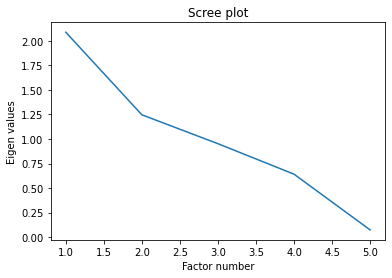

In [103]:
#scree plot
plt.plot(numpy.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

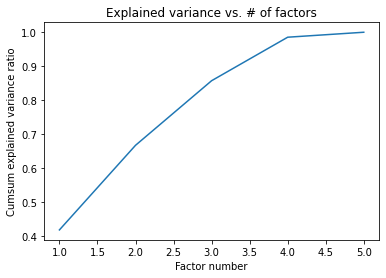

In [104]:
#cumul de variance expliquée
plt.plot(numpy.arange(1,p+1),numpy.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

In [105]:
#seuils pour test des bâtons brisés
bs = 1/numpy.arange(p,0,-1)
bs = numpy.cumsum(bs)
bs = bs[::-1]

In [106]:
#test des bâtons brisés
print(pandas.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

   Val.Propre    Seuils
0    2.087736  2.283333
1    1.246355  1.283333
2    0.951702  0.783333
3    0.641076  0.450000
4    0.073131  0.200000


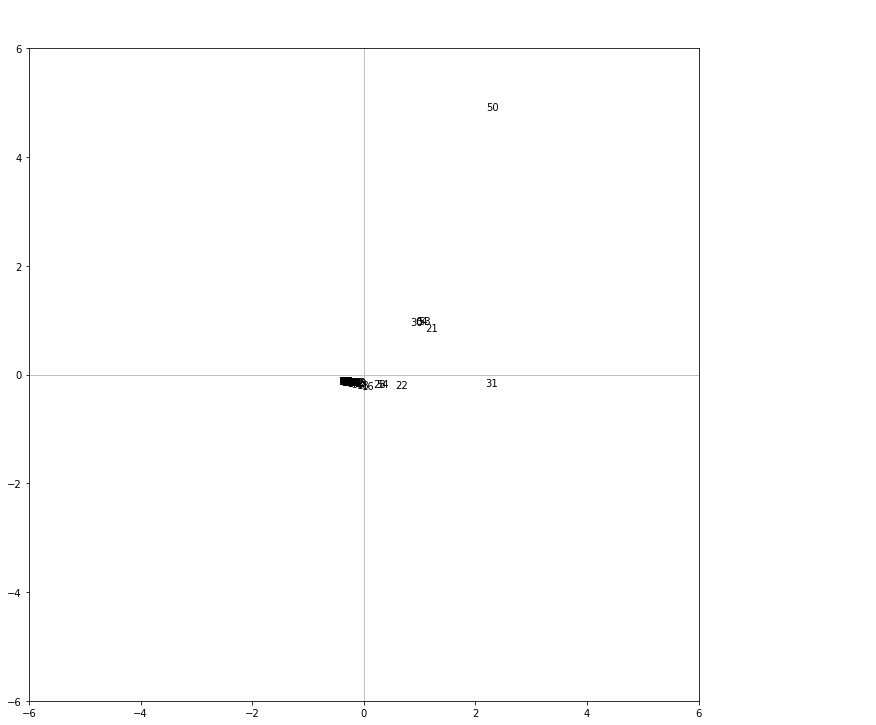

In [107]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
 plt.annotate(X.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

In [108]:
#contribution des individus dans l'inertie totale
di = numpy.sum(Z**2,axis=1)
print(pandas.DataFrame({'ID':X.index,'d_i':di}))

    ID        d_i
0    0   0.232608
1    1   0.189477
2    2   0.232608
3    3  51.895632
4    4   0.232608
..  ..        ...
95  95   0.227954
96  96   0.222905
97  97   0.199338
98  98   0.221853
99  99   0.230043

[100 rows x 2 columns]


In [109]:
#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(p):
 cos2[:,j] = cos2[:,j]/di
print(pandas.DataFrame({'id':X.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

    id    COS2_1    COS2_2
0    0  0.833322  0.141940
1    1  0.787085  0.182010
2    2  0.833322  0.141940
3    3  0.005936  0.746618
4    4  0.833322  0.141940
..  ..       ...       ...
95  95  0.831120  0.145429
96  96  0.828215  0.149401
97  97  0.804572  0.171041
98  98  0.827534  0.150254
99  99  0.832161  0.143844

[100 rows x 3 columns]


In [110]:
#vérifions la théorie - somme en ligne des cos2 = 1
print(numpy.sum(cos2,axis=1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


In [111]:
#contributions aux axes
ctr = coord**2
for j in range(p):
 ctr[:,j] = ctr[:,j]/(n*eigval[j])

print(pandas.DataFrame({'id':X.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

    id     CTR_1     CTR_2
0    0  0.000928  0.000265
1    1  0.000714  0.000277
2    2  0.000928  0.000265
3    3  0.001475  0.310876
4    4  0.000928  0.000265
..  ..       ...       ...
95  95  0.000907  0.000266
96  96  0.000884  0.000267
97  97  0.000768  0.000274
98  98  0.000879  0.000267
99  99  0.000917  0.000265

[100 rows x 3 columns]


In [112]:
#vérifions la théorie
print(numpy.sum(ctr,axis=0))

[1. 1. 1. 1. 1.]


In [113]:
#le champ components_ de l'objet ACP
print(acp.components_)

[[ 0.04357782  0.31646452  0.31422389  0.60782321  0.655565  ]
 [ 0.73658346 -0.25373462  0.60097237 -0.04496843 -0.17283979]
 [ 0.30329613  0.85027189 -0.04799869 -0.42733525 -0.01139665]
 [-0.60179537  0.15922788  0.7294458  -0.18653729 -0.21354503]
 [ 0.03741084  0.29521712 -0.07550167  0.64118422 -0.70329906]]


In [114]:
#racine carrée des valeurs propres
sqrt_eigval = numpy.sqrt(eigval)

In [115]:
#corrélation des variables avec les axes
corvar = numpy.zeros((p,p))
for k in range(p):
 corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)

[[ 0.06296558  0.82232389  0.2958812  -0.48184096  0.01011689]
 [ 0.45725953 -0.28327006  0.82948459  0.12748937  0.07983462]
 [ 0.45402206  0.67092728 -0.04682522  0.58404715 -0.02041767]
 [ 0.87824367 -0.05020288 -0.41688783 -0.14935527  0.1733934 ]
 [ 0.94722577 -0.19295884 -0.01111803 -0.17097962 -0.19019091]]


In [116]:
#on affiche pour les deux premiers axes
print(pandas.DataFrame({'id':X.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

         id     COR_1     COR_2
0      done  0.062966  0.822324
1      type  0.457260 -0.283270
2    status  0.454022  0.670927
3  realWork  0.878244 -0.050203
4  realCost  0.947226 -0.192959


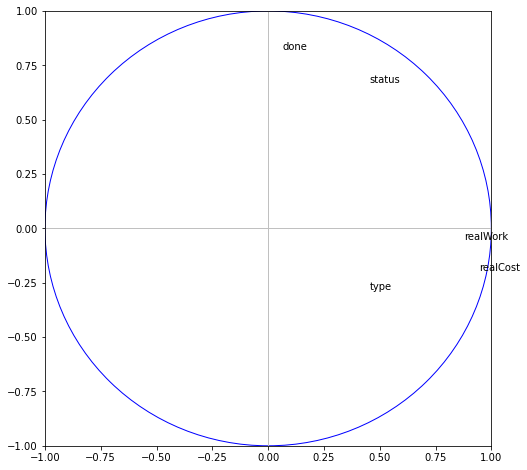

In [117]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(p):
 plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()
